In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [31]:
height = 8
width = 8
size = height*width
path = "..\..\datasets\\UNSW_NB15"
csv_file = path + "\\unswnb15_img_flow.csv"

In [32]:
df1 = pd.read_csv(path+"\\UNSW_NB15_training-set.csv")
df1 = df1.drop(["id"], axis=1)

In [33]:
df2 = pd.read_csv(path+"\\UNSW_NB15_testing-set.csv")
df2 = df2.drop(["id"], axis=1)

In [34]:
df = pd.concat([df1, df2])

In [35]:
df = df.drop_duplicates()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162745 entries, 0 to 82328
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                162745 non-null  float64
 1   proto              162745 non-null  object 
 2   service            162745 non-null  object 
 3   state              162745 non-null  object 
 4   spkts              162745 non-null  int64  
 5   dpkts              162745 non-null  int64  
 6   sbytes             162745 non-null  int64  
 7   dbytes             162745 non-null  int64  
 8   rate               162745 non-null  float64
 9   sttl               162745 non-null  int64  
 10  dttl               162745 non-null  int64  
 11  sload              162745 non-null  float64
 12  dload              162745 non-null  float64
 13  sloss              162745 non-null  int64  
 14  dloss              162745 non-null  int64  
 15  sinpkt             162745 non-null  float64
 16  dinpkt  

In [37]:
df.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [38]:
df.attack_cat.unique()

array(['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode',
       'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic'],
      dtype=object)

In [39]:
df = df.drop(["label"], axis=1)

In [40]:
len(df.proto.unique())

133

In [41]:
indices = list(df.proto.unique())

In [42]:
indices.index("tcp")

0

In [43]:
# move tcp to end of list
indices.remove("tcp")
indices.append("tcp")
indices.index("tcp")

132

In [44]:
indices.index("udp")

0

In [45]:
# move udp to start of list
indices.remove("udp")
indices = ["udp"] + indices
indices.index("udp")

0

In [46]:
df.proto = df.proto.apply(lambda x: indices.index(x))

In [47]:
indices = list(df.service.unique())
df.service = df.service.apply(lambda x: indices.index(x))

In [48]:
indices = list(df.state.unique())
df.state = df.state.apply(lambda x: indices.index(x))

In [49]:
df.proto.unique()

array([132,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131], dtype=int64)

In [50]:
df = df.rename(columns={"attack_cat": "label"})

In [51]:
df.label.unique()

array(['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode',
       'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic'],
      dtype=object)

In [52]:
len(df.label.unique())

10

In [53]:
df.label.value_counts() / len(df)

label
Normal            0.526726
Exploits          0.168570
Fuzzers           0.128790
Reconnaissance    0.061391
Generic           0.046693
DoS               0.033795
Analysis          0.012486
Backdoor          0.011552
Shellcode         0.008947
Worms             0.001051
Name: count, dtype: float64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162745 entries, 0 to 82328
Data columns (total 43 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                162745 non-null  float64
 1   proto              162745 non-null  int64  
 2   service            162745 non-null  int64  
 3   state              162745 non-null  int64  
 4   spkts              162745 non-null  int64  
 5   dpkts              162745 non-null  int64  
 6   sbytes             162745 non-null  int64  
 7   dbytes             162745 non-null  int64  
 8   rate               162745 non-null  float64
 9   sttl               162745 non-null  int64  
 10  dttl               162745 non-null  int64  
 11  sload              162745 non-null  float64
 12  dload              162745 non-null  float64
 13  sloss              162745 non-null  int64  
 14  dloss              162745 non-null  int64  
 15  sinpkt             162745 non-null  float64
 16  dinpkt  

In [25]:
df = df.to_numpy()
df.shape

(162745, 43)

In [26]:
# normalize payload, ttl, total_len
for col_index in range(df.shape[1]-1):
    column = df[:, col_index]
    column_normalized = (column - np.min(column)) / (np.max(column) - np.min(column) + 0.1)
    df[:, col_index] = column_normalized

(42,)
Normal
(64,)
(8, 8)


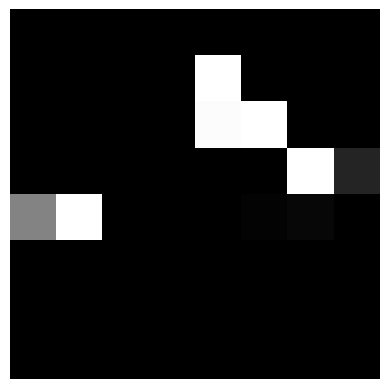

DONE


In [27]:
def convert_dataset_to_grayscale_image(arr):
    for idx, row in enumerate(arr):
        data = row[:-1]
        label = row[-1]
        print(data.shape)
        print(label)
        
        data = np.pad(data, pad_width=int((size-len(data))/2), constant_values=0)
        print(data.shape)
        data = data.reshape(height, width).astype('float64')
        print(data.shape)
        
        plt.imshow(data, cmap='gray')
        plt.axis('off')  # Remove axes
        plt.show()
        
        break
    print("DONE")
        
convert_dataset_to_grayscale_image(df)

(42,)
Normal
(8, 8)
(8, 8)
(8, 8)
(8, 8, 3)


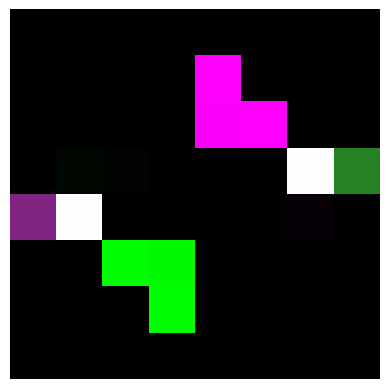

DONE


In [28]:
def convert_dataset_to_rgb_image(arr):
    for idx, row in enumerate(arr):
        data = row[:-1]
        label = row[-1]
        print(data.shape)
        print(label)
        
        data = np.pad(data, pad_width=int((size-len(data))/2), constant_values=0)
        data = data.reshape(height, width)
        
        channel_1 = data.astype('float64')
        print(channel_1.shape)
        channel_2 = np.rot90(channel_1, k=2).reshape(height, width)
        print(channel_2.shape)
        channel_3 = np.rot90(channel_2, k=2).reshape(height, width)
        print(channel_3.shape)
        img = np.stack((channel_1, channel_2, channel_3)).transpose((1, 2, 0))
        print(img.shape)
        
        plt.imshow(img)
        plt.axis('off')  # Remove axes
        plt.show()
        
        break
    print("DONE")
        
convert_dataset_to_rgb_image(df)

In [ ]:
with open(csv_file, 'w') as f:
    np.savetxt(f, [np.array(["file_name", "label"])], delimiter=',', fmt='%s')

def convert_dataset_to_image(arr):
    with open(csv_file, 'a') as f:
        for idx, row in enumerate(arr):
            data = row[:-1]
            label = row[-1]
            if idx % 1000 == 0:
                print(idx, label)
            
            data = np.pad(data, pad_width=int((size-len(data))/2), constant_values=0)
            data = data.reshape(height, width)
            
            channel_1 = data.astype('float64')
            channel_2 = np.rot90(channel_1, k=2).reshape(height, width)
            channel_3 = np.rot90(channel_2, k=2).reshape(height, width)
            img = np.stack((channel_1, channel_2, channel_3)).transpose((1, 2, 0))
            
            file_name = f"unswnb15_{idx}.png"
            cv2.imwrite(path+"\image_flow\\"+file_name, img*255)
            
            log = np.array([file_name, label])
            np.savetxt(f, [log], delimiter=',', fmt='%s')
    print("DONE")
        

# convert_dataset_to_image(df)